In [1]:
from keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


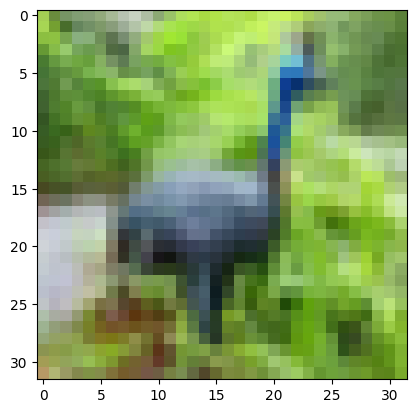

In [2]:

import matplotlib.pyplot as plt



plt.imshow(x_train[6])
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np



x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [4]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trans_model = ResNet50(include_top=False,  #
                 weights="imagenet",
                 input_shape=(32,32,3),
                 classes=1000)


94765736/94765736 [==============================] - 0s 0us/step


In [5]:
trans_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [9]:
trans_model.trainable = False


from tensorflow.keras.layers import Flatten, Dropout

model= Sequential()

model.add(trans_model)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
391/391 [==============================] - 206s 519ms/step - loss: 2.0619 - accuracy: 0.2402
Epoch 2/10
391/391 [==============================] - 199s 509ms/step - loss: 1.8672 - accuracy: 0.3199
Epoch 3/10
391/391 [==============================] - 199s 508ms/step - loss: 1.8059 - accuracy: 0.3465
Epoch 4/10
391/391 [==============================] - 199s 509ms/step - loss: 1.7765 - accuracy: 0.3567
Epoch 5/10
391/391 [==============================] - 198s 508ms/step - loss: 1.7479 - accuracy: 0.3663
Epoch 6/10
391/391 [==============================] - 198s 507ms/step - loss: 1.7280 - accuracy: 0.3766
Epoch 7/10
391/391 [==============================] - 200s 512ms/step - loss: 1.7153 - accuracy: 0.3820
Epoch 8/10
391/391 [==============================] - 198s 506ms/step - loss: 1.6894 - accuracy: 0.3897
Epoch 9/10
391/391 [==============================] - 202s 516ms/step - loss: 1.6825 - accuracy: 0.3949
Epoch 10/10
391/391 [==============================] - 200s 511m